# Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

In [3]:
# Training
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [4]:
# Making predction
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

In [5]:
y_pred

array([ True, False])

# Building a image classfier

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [11]:
X_train.shape

(55000, 28, 28)

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [12]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

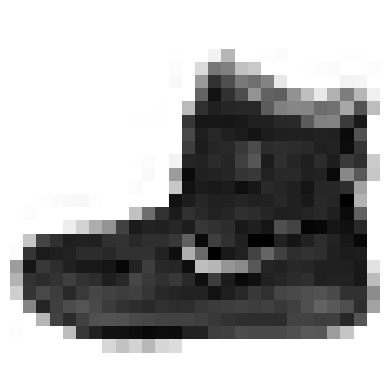

In [13]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.axis(False)
plt.show()

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Ankle boot'

In [16]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

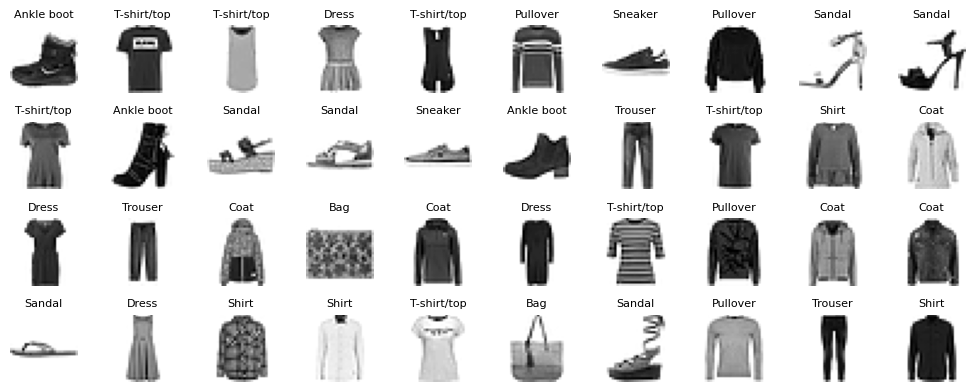

In [17]:
import matplotlib.pyplot as plt

n_rows, n_cols = 4, 10
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows))

for idx, ax in enumerate(axes.flat):
    ax.imshow(X_train[idx], cmap="binary")
    ax.axis("off")
    ax.set_title(class_names[y_train[idx]], fontsize=8)

plt.tight_layout(pad=1.0)
plt.show()

# Creating the model using the Sequential API

neural network (MLP)

In [18]:
# model = keras.models.Sequential()

# model.add(keras.layers.InputLayer(input_shape=[28, 28]))
# model.add(tf.keras.layers.Flatten())
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

In [28]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.InputLayer(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [22]:
hidden1 = model.layers[1]

In [23]:
hidden1.name

'dense'

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[ 0.07259473,  0.00617625,  0.03029299, ...,  0.06572488,
        -0.05227008,  0.05752236],
       [-0.00964269,  0.02793863, -0.07061702, ..., -0.04834175,
         0.05153364, -0.03332751],
       [-0.04197078,  0.03479156, -0.03435629, ..., -0.01310332,
         0.0471981 ,  0.07425988],
       ...,
       [-0.062339  , -0.03143132, -0.03225444, ..., -0.00828759,
        -0.02410597, -0.01202142],
       [ 0.00036252, -0.07233394, -0.02133339, ...,  0.04838133,
        -0.06246951,  0.01269094],
       [-0.0674815 , -0.06626229,  0.02544461, ...,  0.00937513,
         0.01004808, -0.01791855]], dtype=float32)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
weights.shape

(784, 300)

# Compiling the model

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

# Training and evaluating the model

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6746 - loss: 1.0217 - val_accuracy: 0.8286 - val_loss: 0.5056
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8235 - loss: 0.5109 - val_accuracy: 0.8386 - val_loss: 0.4531
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8417 - loss: 0.4569 - val_accuracy: 0.8436 - val_loss: 0.4302
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8520 - loss: 0.4265 - val_accuracy: 0.8480 - val_loss: 0.4153
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8596 - loss: 0.4048 - val_accuracy: 0.8512 - val_loss: 0.4043
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8659 - loss: 0.3872 - val_accuracy: 0.8538 - val_loss: 0.3941
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8701 - loss: 0.3727 - val_accuracy: 0.8574 - val_loss: 0.3878
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8735 - loss: 0

In [35]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [36]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


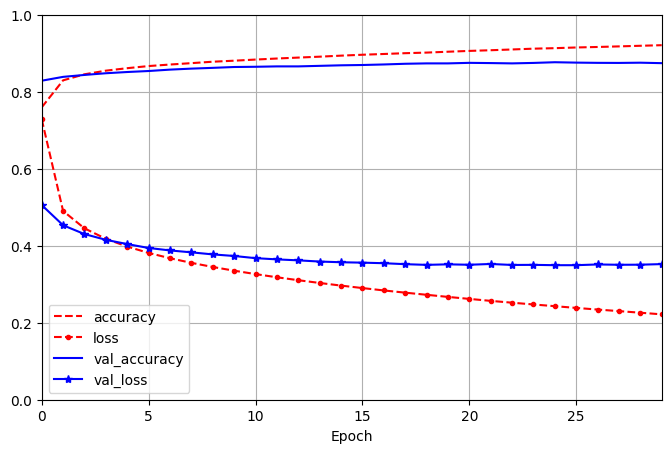

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left") 
plt.show()

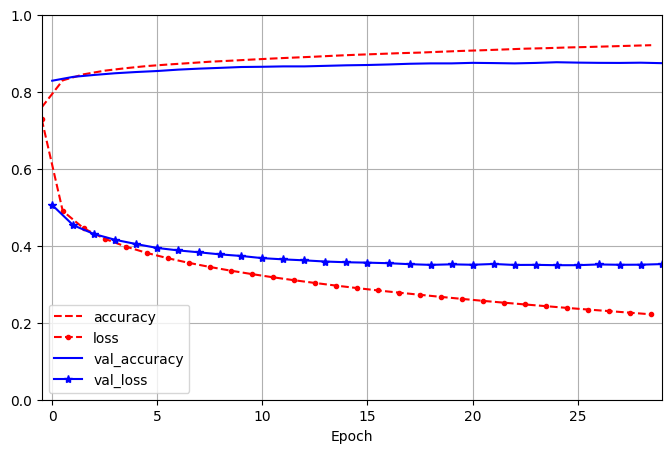

In [39]:
# shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8747 - loss: 0.3694


[0.3687993884086609, 0.8725000023841858]